In [28]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import os

# Load 3D Brain MRI image

In [49]:
# Load the .nii file using Nibabel
image = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii')

# Transform the image in 3D-array format
image_data = image.get_fdata()

# Check the shape of 3D-MRI
print("The shape of 3D MRI is:",image_data.shape)

The shape of 3D MRI is: (113, 137, 113)


Explain the 3D shape, here here

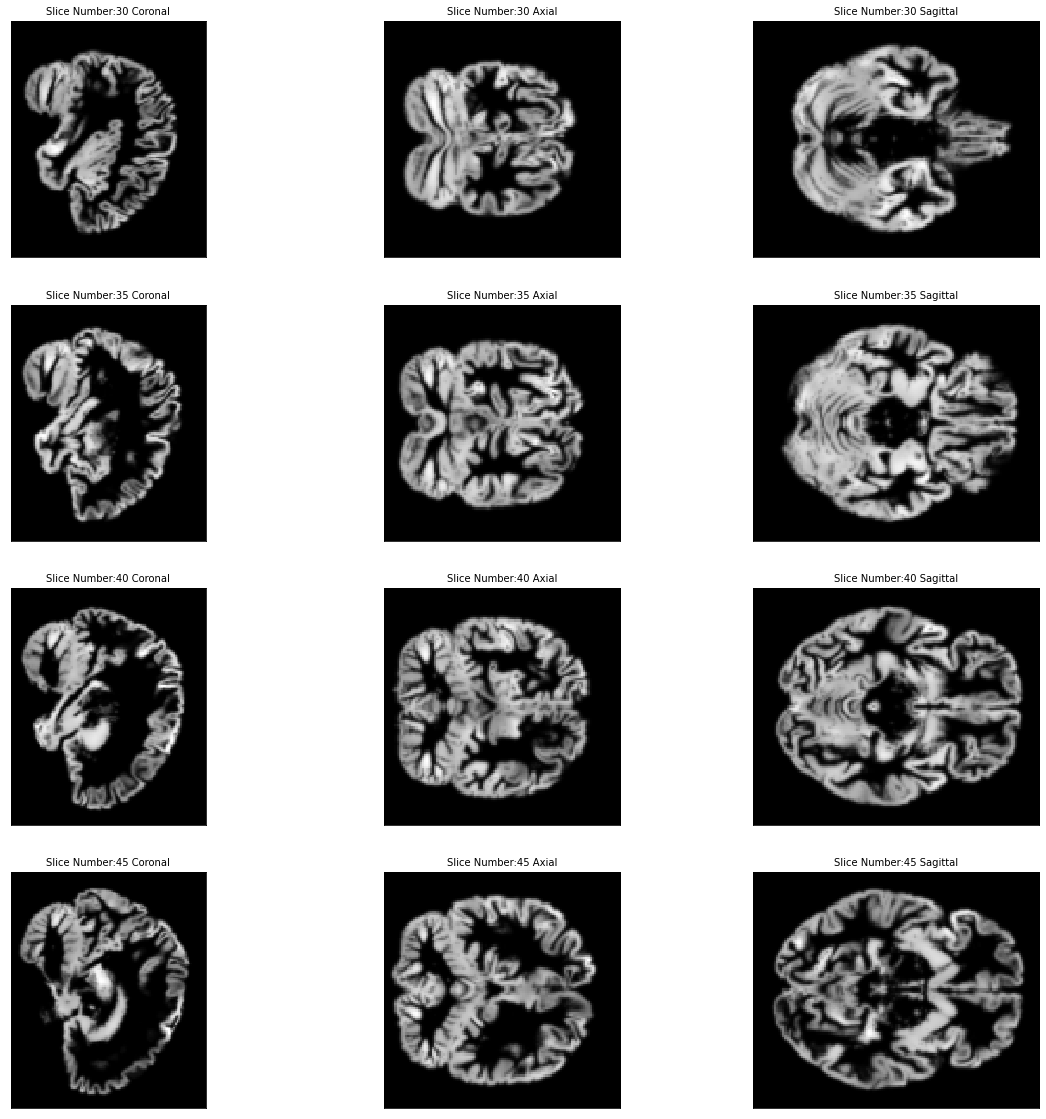

In [84]:
slices = []
start, end, step = (30,46,5)
for i in range(start, end, step):
    image_data = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii').get_fdata()
    slices.append([image_data[i,:,:],image_data[:,i,:],image_data[:,:,i]])

slice_dict = {
    0 : "Coronal",
    1 : "Axial",
    2 : "Sagittal"
}
fig = plt.figure(figsize=(20, 20))
for i in range(len(slices)):
    slice_list = [slices[i][0], slices[i][1], slices[i][2]]
    for k, a in enumerate(slice_list):
        idx = ((i+1)*3)+ (k-2)
        ax = fig.add_subplot(len(slices),len(slice_list),idx)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(f"Slice Number:{start+(5*i)} {slice_dict[k]}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    